In [3]:
import pandas as pd
import numpy as np

In [279]:
event_type= pd.read_csv("C:/Users/ssssa/Desktop/Telstra/event_type.csv") 
Id_events = pd.DataFrame(event_type['id'].value_counts()).rename(columns={'id':'Id_events'})

In [307]:
Id_events.head(5)

,Id_events
10354,11
15184,10
14243,10
17023,9
8590,9


In [308]:
t= data.merge(Id_events, right_index=True, left_index=True, how='left').fillna(0)
        

In [333]:
event_type= pd.read_csv("C:/Users/ssssa/Desktop/Telstra/event_type.csv")
log_feature=pd.read_csv("C:/Users/ssssa/Desktop/Telstra/log_feature.csv")
resource_type=pd.read_csv("C:/Users/ssssa/Desktop/Telstra/resource_type.csv")
severity_type=pd.read_csv("C:/Users/ssssa/Desktop/Telstra/severity_type.csv")
train= pd.read_csv("C:/Users/ssssa/Desktop/Telstra/train.csv")
test=pd.read_csv("C:/Users/ssssa/Desktop/Telstra/test.csv")

In [334]:
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train,test], ignore_index=True)
data.head()

,fault_severity,id,location,source
0,1.0,14121,location 118,train
1,0.0,9320,location 91,train
2,1.0,14394,location 152,train
3,1.0,8218,location 931,train
4,0.0,14804,location 120,train


In [335]:
data = data.merge(event_type, on='id')

In [336]:
data.head()

,fault_severity,id,location,source,event_type
0,1.0,14121,location 118,train,event_type 34
1,1.0,14121,location 118,train,event_type 35
2,0.0,9320,location 91,train,event_type 34
3,0.0,9320,location 91,train,event_type 35
4,1.0,14394,location 152,train,event_type 35


In [337]:
data = data.merge(log_feature, on='id')
data = data.merge(resource_type, on='id')
data = data.merge(severity_type, on='id')


In [338]:
data.head()

,fault_severity,id,location,source,event_type,log_feature,volume,resource_type,severity_type
0,1.0,14121,location 118,train,event_type 34,feature 312,19,resource_type 2,severity_type 2
1,1.0,14121,location 118,train,event_type 34,feature 232,19,resource_type 2,severity_type 2
2,1.0,14121,location 118,train,event_type 35,feature 312,19,resource_type 2,severity_type 2
3,1.0,14121,location 118,train,event_type 35,feature 232,19,resource_type 2,severity_type 2
4,0.0,9320,location 91,train,event_type 34,feature 315,200,resource_type 2,severity_type 2


In [339]:
df = train.append(test)

In [340]:
df.head()

,fault_severity,id,location,source
0,1.0,14121,location 118,train
1,0.0,9320,location 91,train
2,1.0,14394,location 152,train
3,1.0,8218,location 931,train
4,0.0,14804,location 120,train


In [341]:
from matplotlib import pyplot as plt


In [342]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data['event_type'])
le.transform(data['event_type'])
data.head(3)

,fault_severity,id,location,source,event_type,log_feature,volume,resource_type,severity_type
0,1.0,14121,location 118,train,event_type 34,feature 312,19,resource_type 2,severity_type 2
1,1.0,14121,location 118,train,event_type 34,feature 232,19,resource_type 2,severity_type 2
2,1.0,14121,location 118,train,event_type 35,feature 312,19,resource_type 2,severity_type 2


In [343]:
data['event_type']=le.transform(data['event_type'])

In [344]:
le.fit(data['location'])
data['location']=le.transform(data['location'])
le.fit(data['log_feature'])
data['log_feature']=le.transform(data['log_feature'])
le.fit(data['resource_type'])
data['resource_type']=le.transform(data['resource_type'])
le.fit(data['severity_type'])
data['severity_type']=le.transform(data['severity_type'])

In [345]:
df = train.append(test)

In [346]:
#x= data.loc[:,['id','severity_type','fault_severity','location']]
#x.head()

In [347]:
data['id'].value_counts().head(10)

1379     390
10354    374
14243    320
4266     300
7378     300
4582     300
215      288
2977     280
11055    275
3742     270
Name: id, dtype: int64

In [348]:
#x['num_1'] = data.groupby('location')['fault_severity'].transform(lambda x: np.arange(x.shape[0])+1)

In [349]:
#x.head()

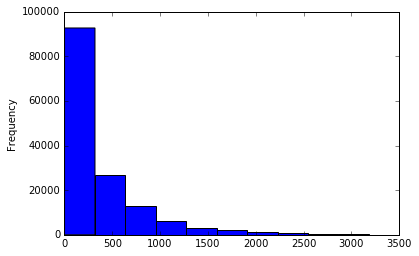

In [350]:
data['location_count'] = data.groupby('location').cumcount() + 1
data['location_count'].plot(kind='hist')

In [351]:
data['reversenumber'] = data.groupby('location')['location_count'].transform(lambda x: x.max() + 1 - x)
#data.head(100)
data.loc[:,['severity_type','fault_severity','reversenumber','location','location_count']].head(40)

,severity_type,fault_severity,reversenumber,location,location_count
0,1,1.0,552,148,1
1,1,1.0,551,148,2
2,1,1.0,550,148,3
3,1,1.0,549,148,4
4,1,0.0,748,1027,1
5,1,0.0,747,1027,2
6,1,0.0,746,1027,3
7,1,0.0,745,1027,4
8,1,1.0,53,186,1
9,1,1.0,52,186,2


In [304]:
data.loc[:,['severity_type','fault_severity','reversenumber','location','location_count']].tail(12)

,severity_type,fault_severity,reversenumber,location,location_count
146411,0,NaN,12,503,58
146412,0,NaN,11,503,59
146413,0,NaN,10,503,60
146414,0,NaN,9,503,61
146415,0,NaN,8,503,62
146416,0,NaN,7,503,63
146417,0,NaN,6,503,64
146418,0,NaN,5,503,65
146419,0,NaN,4,503,66
146420,0,NaN,3,503,67


In [305]:
#common_locs = x.location.value_counts().index[:20]

data.loc[data['location']==151,['id','location','reversenumber','location_count']].head()

,id,location,reversenumber,location_count
18,14804,151,171,1
19,14804,151,170,2
20,14804,151,169,3
21,14804,151,168,4
22,14804,151,167,5


In [306]:
data.loc[data['location']==832,['id','location','reversenumber','location_count']].head()

,id,location,reversenumber,location_count
1278,15209,832,2383,1
1279,15209,832,2382,2
1280,15209,832,2381,3
1281,15209,832,2380,4
1282,15209,832,2379,5


In [381]:
train_1= pd.read_csv("C:/Users/ssssa/Desktop/Telstra/train_new1.csv")
test_1=pd.read_csv("C:/Users/ssssa/Desktop/Telstra/test_new1.csv")

In [382]:
train_1['source'] = 'train'
test_1['source'] = 'test'
data1 = pd.concat([train_1,test_1], ignore_index=True)
data1.head()


,Remove,event_type 1,event_type 10,event_type 11,event_type 12,event_type 13,event_type 14,event_type 15,event_type 17,event_type 18,...,resource_type 6,resource_type 7,resource_type 8,resource_type 9,severity_type 1,severity_type 2,severity_type 3,severity_type 4,severity_type 5,source
0,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,train
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,train
2,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,train
3,0.0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,train
4,0.0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,train


In [383]:
data1['location'].head(3)

0     148
1    1027
2     186
Name: location, dtype: int64

In [384]:
data1.shape

(18552, 196)

In [391]:
data1['location_count'] = data.groupby('location').cumcount() + 1
#data1['location_count'] = data1.groupby('location')['fault_severity'].transform(lambda x: np.arange(x.shape[0])+1)
data1.head()

,Remove,event_type 1,event_type 10,event_type 11,event_type 12,event_type 13,event_type 14,event_type 15,event_type 17,event_type 18,...,resource_type 7,resource_type 8,resource_type 9,severity_type 1,severity_type 2,severity_type 3,severity_type 4,severity_type 5,source,location_count
0,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,train,1
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,train,2
2,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,train,3
3,0.0,0,0,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,train,4
4,0.0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,train,1


In [394]:
data1.loc[:,['id','severity_type','fault_severity','location','location_count']].head(40)
#data1['reversenumber'] = data1.groupby('location')['location_count'].transform(lambda x: x.max() + 1 - x)

,id,severity_type,fault_severity,location,location_count
0,14121,NaN,1.0,148,1
1,9320,NaN,0.0,1027,2
2,14394,NaN,1.0,186,3
3,8218,NaN,1.0,1051,4
4,14804,NaN,0.0,151,1
5,1080,NaN,0.0,754,2
6,9731,NaN,0.0,728,3
7,15505,NaN,0.0,153,4
8,3443,NaN,1.0,309,1
9,13300,NaN,1.0,698,2


In [395]:
locbool = data1['location']==832
data1.loc[locbool,['id','location','location_count']].head()

,id,location,location_count
149,15209,832,3
249,6234,832,2
259,411,832,1
342,6187,832,30
360,3214,832,48


In [397]:
data1.head(3)

,Remove,event_type 1,event_type 10,event_type 11,event_type 12,event_type 13,event_type 14,event_type 15,event_type 17,event_type 18,...,resource_type 7,resource_type 8,resource_type 9,severity_type 1,severity_type 2,severity_type 3,severity_type 4,severity_type 5,source,location_count
0,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,train,1
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,train,2
2,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,train,3


In [398]:
data1.loc[:,['id','severity_type','fault_severity','reversenumber','location','location_count']].tail(12)

,id,severity_type,fault_severity,reversenumber,location,location_count
18540,9406,NaN,NaN,NaN,24,64
18541,7520,NaN,NaN,NaN,155,65
18542,6446,NaN,NaN,NaN,14,66
18543,9063,NaN,NaN,NaN,1096,67
18544,11825,NaN,NaN,NaN,238,68
18545,8982,NaN,NaN,NaN,725,69
18546,2356,NaN,NaN,NaN,912,8
18547,14806,NaN,NaN,NaN,83,56
18548,1825,NaN,NaN,NaN,112,57
18549,2374,NaN,NaN,NaN,1035,58


In [399]:
train1 = data1.loc[data1['source']=='train']
test1 = data1.loc[data1['source']=='test']
train1.drop('source',axis=1,inplace=True)
test1.drop(['source','fault_severity'],axis=1,inplace=True)
train1.to_csv('C:/Users/ssssa/Desktop/Telstra/train2.csv',index=False)
test1.to_csv('C:/Users/ssssa/Desktop/Telstra/test2.csv',index=False)

C:\Users\ssssa\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\ssssa\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [401]:
train1.shape


(7381, 196)

In [402]:
test1.shape

(11171, 195)

In [404]:
target = 'fault_severity'
IDcol = 'id'
output_colnames = ['predict_0','predict_1','predict_2']

In [409]:
import xgboost as xgb

In [407]:
predictors = [x for x in train.columns if x not in [target, IDcol]]

In [410]:
train['fault_severity'].head()

0    1
1    0
2    1
3    1
4    0
Name: fault_severity, dtype: int64

In [412]:
train_output= train1['fault_severity']


In [413]:
train1.drop(['fault_severity'],axis=1,inplace=True)

C:\Users\ssssa\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [414]:
gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(train1, train_output)


In [415]:
predictions = gbm.predict(test1)

In [436]:
predictions

array([ 0.,  2.,  0., ...,  1.,  0.,  0.])

In [439]:
df=pd.DataFrame(predictions)

In [440]:
df.head()

,0
0,0.0
1,2.0
2,0.0
3,0.0
4,1.0


In [442]:
df.to_csv('C:/Users/ssssa/Desktop/Telstra/ass1.csv')

In [443]:
a= pd.read_csv('C:/Users/ssssa/Desktop/Telstra/ass1.csv')

In [444]:
enc = preprocessing.OneHotEncoder()

In [445]:
enc.fit(a)

OneHotEncoder(categorical_features='all', dtype=<type 'float'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [446]:
enc.transform(a).toarray()

array([[ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       ..., 
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

In [447]:
b= pd.DataFrame(enc.transform(a).toarray())

In [448]:
b.to_csv('C:/Users/ssssa/Desktop/Telstra/ass2.csv')

In [ ]:
gbm = xgb.XGBClassifier('learning_rate':0.02,
    'n_estimators':455,
    'max_depth':6,
    'min_child_weight':2,
    'gamma':0.1,
    'subsample':0.9,
    'colsample_bytree':0.5,
    'objective': 'multi:softprob',
    'num_class':3,
    'eval_metric':['mlogloss'],
    'missing':-1,
    'nthread':4,
    'scale_pos_weight':1,
            'reg_alpha':0.05,
    'reg_lambda':0.1,
            'seed':s).fit(train1, train_output)

